In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
from math import sqrt
from sklearn.metrics import mean_squared_error as mse
import pytz
from scipy.constants import convert_temperature

In [3]:
df_el = pd.read_csv('./observation/East Lansing 5 min_crc.csv')
df_gl = pd.read_csv('./observation/CRNH0203-2007-2018-MI_Gaylord_9_SSW_crc.csv')
df_gr = pd.read_csv('./observation/ASOS Grand Rapids_crc.csv')
df_ele = pd.read_csv('./observation/East Leland 5 min.csv')
df_sh = pd.read_csv('./observation/South Haven 5 min_crc.csv')
df_tvc = pd.read_csv('observation/ASOS Traverse City_crc_1.csv')

In [4]:
t_daymin_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].min()
t_daymin_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['atmp'].min()
t_daymin_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['atmp'].min()
t_daymin_obs_ele = df_ele.groupby([df_ele.year,df_ele.month,df_ele.day])['atmp'].min()
t_daymin_obs_sh = df_sh.groupby([df_sh.year,df_sh.month,df_sh.day])['atmpF'].min()
t_daymin_obs_tvc = df_tvc.groupby([df_tvc.YEAR,df_tvc.MONTH,df_tvc.DAY])['atmp'].min()

t_daymin_obs = [t_daymin_obs_el,t_daymin_obs_gl,t_daymin_obs_ele,t_daymin_obs_sh,t_daymin_obs_gr,t_daymin_obs_tvc]

In [5]:
t_daymax_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].max()
t_daymax_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['atmp'].max()
t_daymax_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['atmp'].max()
t_daymax_obs_ele = df_ele.groupby([df_ele.year,df_ele.month,df_ele.day])['atmp'].max()
t_daymax_obs_sh = df_sh.groupby([df_sh.year,df_sh.month,df_sh.day])['atmpF'].max()
t_daymax_obs_tvc = df_tvc.groupby([df_tvc.YEAR,df_tvc.MONTH,df_tvc.DAY])['atmp'].max()

t_daymax_obs = [t_daymax_obs_el,t_daymax_obs_gl,t_daymax_obs_ele,t_daymax_obs_sh,t_daymax_obs_gr,t_daymax_obs_tvc]

In [6]:
era_el = pd.read_csv('./extracted/East_lansing/East_Lansing_9km.csv')
era_gl = pd.read_csv('./extracted/Gaylord/Gaylord_9km.csv')
era_gr = pd.read_csv('./extracted/GRR/GRR_9km.csv')
era_ele = pd.read_csv('./extracted/East_Leland/East_Leland_9km.csv')
era_sh = pd.read_csv('./extracted/South_Haven/South_Haven_9km.csv')
era_tvc = pd.read_csv('extracted/TVC/TVC_9km.csv')[:-19]


era_gl = era_gl.drop(era_gl.index[:-98905])
era_gl = era_gl.reset_index(drop=True)
era_gr = era_gr.drop(era_gr.index[157751:])
era_ele = era_ele[20424:]
era_sh = era_sh[46104:]
era_ele = era_ele.reset_index(drop=True)
era_sh = era_sh.reset_index(drop=True)
era_tvc = era_tvc.reset_index(drop=True)

t_daymin_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].min()
t_daymin_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].min()
t_daymin_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].min()
t_daymin_era_ele = era_ele.groupby([era_ele.YEAR,era_ele.MONTH,era_ele.DAY])['atmp'].min()
t_daymin_era_sh = era_sh.groupby([era_sh.YEAR,era_sh.MONTH,era_sh.DAY])['atmp'].min()
t_daymin_era_tvc = era_tvc.groupby([era_tvc.YEAR,era_tvc.MONTH,era_tvc.DAY])['atmp'].min()

t_daymin_eraair = [t_daymin_era_el,t_daymin_era_gl,t_daymin_era_ele,t_daymin_era_sh,t_daymin_era_gr,t_daymin_era_tvc]

t_daymax_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].max()
t_daymax_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].max()
t_daymax_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].max()
t_daymax_era_ele = era_ele.groupby([era_ele.YEAR,era_ele.MONTH,era_ele.DAY])['atmp'].max()
t_daymax_era_sh = era_sh.groupby([era_sh.YEAR,era_sh.MONTH,era_sh.DAY])['atmp'].max()
t_daymax_era_tvc = era_tvc.groupby([era_tvc.YEAR,era_tvc.MONTH,era_tvc.DAY])['atmp'].max()

t_daymax_eraair = [t_daymax_era_el,t_daymax_era_gl,t_daymax_era_ele,t_daymax_era_sh,t_daymax_era_gr,t_daymax_era_tvc]

In [7]:
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/1/2019', freq='H')[:-1].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
hour = dff.strftime('%-H')

In [8]:
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
stations = ['East_lansing', 'Gaylord', 'East_Leland', 'South_Haven','GRR',  'TVC']
skin_temp = []
soil_temp = []
for i in range(6):
    df = pd.read_csv(f'./extracted/{stations[i]}/skintemp_2001-2018_9km.csv')
    Temp = convert_temperature(df.skintemp, 'Kelvin', 'Fahrenheit')
    out = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day, 'HOUR':hour, 'atmp':Temp})
    out = out.drop(out.index[:6])
    skin_temp.append(out)
    
    df1 = pd.read_csv(f'./extracted/{stations[i]}/soiltemp_2001-2018_9km.csv')
    Temp1 = convert_temperature(df1.soiltemp, 'Kelvin', 'Fahrenheit')
    out1 = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day, 'HOUR':hour, 'atmp':Temp1})
    out1 = out1.drop(out1.index[:6])
    soil_temp.append(out1)

In [9]:
era_el = skin_temp[0]
era_gl = skin_temp[1]
era_gl = era_gl.drop(era_gl.index[:-98905])
era_gl = era_gl.reset_index(drop=True)
era_ele = skin_temp[2]
era_ele = era_ele[20424:]
era_ele = era_ele.reset_index(drop=True)
era_sh = skin_temp[3]
era_sh = era_sh[46104:]
era_sh = era_sh.reset_index(drop=True)
era_gr = skin_temp[4]
era_gr = era_gr.drop(era_gr.index[157751:])
era_gr = era_gr.reset_index(drop=True)
era_tvc = skin_temp[5][:-19]
era_tvc = era_tvc.reset_index(drop=True)

t_daymin_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].min()
t_daymin_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].min()
t_daymin_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].min()
t_daymin_era_ele = era_ele.groupby([era_ele.YEAR,era_ele.MONTH,era_ele.DAY])['atmp'].min()
t_daymin_era_sh = era_sh.groupby([era_sh.YEAR,era_sh.MONTH,era_sh.DAY])['atmp'].min()
t_daymin_era_tvc = era_tvc.groupby([era_tvc.YEAR,era_tvc.MONTH,era_tvc.DAY])['atmp'].min()

t_daymin_eraskin = [t_daymin_era_el,t_daymin_era_gl,t_daymin_era_ele,t_daymin_era_sh,t_daymin_era_gr,t_daymin_era_tvc]

t_daymax_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].max()
t_daymax_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].max()
t_daymax_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].max()
t_daymax_era_ele = era_ele.groupby([era_ele.YEAR,era_ele.MONTH,era_ele.DAY])['atmp'].max()
t_daymax_era_sh = era_sh.groupby([era_sh.YEAR,era_sh.MONTH,era_sh.DAY])['atmp'].max()
t_daymax_era_tvc = era_tvc.groupby([era_tvc.YEAR,era_tvc.MONTH,era_tvc.DAY])['atmp'].max()

t_daymax_eraskin = [t_daymax_era_el,t_daymax_era_gl,t_daymax_era_ele,t_daymax_era_sh,t_daymax_era_gr,t_daymax_era_tvc]

In [10]:
era_el = soil_temp[0]
era_gl = soil_temp[1]
era_gl = era_gl.drop(era_gl.index[:-98905])
era_gl = era_gl.reset_index(drop=True)
era_ele = soil_temp[2]
era_ele = era_ele[20424:]
era_ele = era_ele.reset_index(drop=True)
era_sh = soil_temp[3]
era_sh = era_sh[46104:]
era_sh = era_sh.reset_index(drop=True)
era_gr = soil_temp[4]
era_gr = era_gr.drop(era_gr.index[157751:])
era_gr = era_gr.reset_index(drop=True)
era_tvc = soil_temp[5][:-19]
era_tvc = era_tvc.reset_index(drop=True)

t_daymin_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].min()
t_daymin_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].min()
t_daymin_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].min()
t_daymin_era_ele = era_ele.groupby([era_ele.YEAR,era_ele.MONTH,era_ele.DAY])['atmp'].min()
t_daymin_era_sh = era_sh.groupby([era_sh.YEAR,era_sh.MONTH,era_sh.DAY])['atmp'].min()
t_daymin_era_tvc = era_tvc.groupby([era_tvc.YEAR,era_tvc.MONTH,era_tvc.DAY])['atmp'].min()

t_daymin_erasoil = [t_daymin_era_el,t_daymin_era_gl,t_daymin_era_ele,t_daymin_era_sh,t_daymin_era_gr,t_daymin_era_tvc]

t_daymax_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].max()
t_daymax_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].max()
t_daymax_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].max()
t_daymax_era_ele = era_ele.groupby([era_ele.YEAR,era_ele.MONTH,era_ele.DAY])['atmp'].max()
t_daymax_era_sh = era_sh.groupby([era_sh.YEAR,era_sh.MONTH,era_sh.DAY])['atmp'].max()
t_daymax_era_tvc = era_tvc.groupby([era_tvc.YEAR,era_tvc.MONTH,era_tvc.DAY])['atmp'].max()

t_daymax_erasoil = [t_daymax_era_el,t_daymax_era_gl,t_daymax_era_ele,t_daymax_era_sh,t_daymax_era_gr,t_daymax_era_tvc]

In [98]:
import pytz
eastern = pytz.timezone('US/Eastern')
dff = [pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='9/19/2007', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='5/2/2003', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='4/6/2006', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)]
locn = ['el','gl','ele','sh','gr','tvc']
t_daymin_obs = [t_daymin_obs_el,t_daymin_obs_gl,t_daymin_obs_ele,t_daymin_obs_sh,t_daymin_obs_gr,t_daymin_obs_tvc]
t_daymin_diff_skin = []
t_daymin_diff_soil = []
t_daymin_diff_air = []
for i in range(6):
    year = dff[i].strftime('%Y')
    mon = dff[i].strftime('%-m')
    day = dff[i].strftime('%-d')
    
    mdiff = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymin_diff':np.array(t_daymin_eraskin[i])-np.array(t_daymin_obs[i])})
    mdiff = mdiff.astype(float)
    t_daymin_diff_skin.append(np.array(mdiff.groupby([mdiff.YEAR,mdiff.MONTH])['t_daymin_diff'].mean()))
    
    mdiff = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymin_diff':np.array(t_daymin_erasoil[i])-np.array(t_daymin_obs[i])})
    mdiff = mdiff.astype(float)
    t_daymin_diff_soil.append(np.array(mdiff.groupby([mdiff.YEAR,mdiff.MONTH])['t_daymin_diff'].mean()))
    
    mdiff = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymin_diff':np.array(t_daymin_eraair[i])-np.array(t_daymin_obs[i])})
    mdiff = mdiff.astype(float)
    t_daymin_diff_air.append(np.array(mdiff.groupby([mdiff.YEAR,mdiff.MONTH])['t_daymin_diff'].mean()))

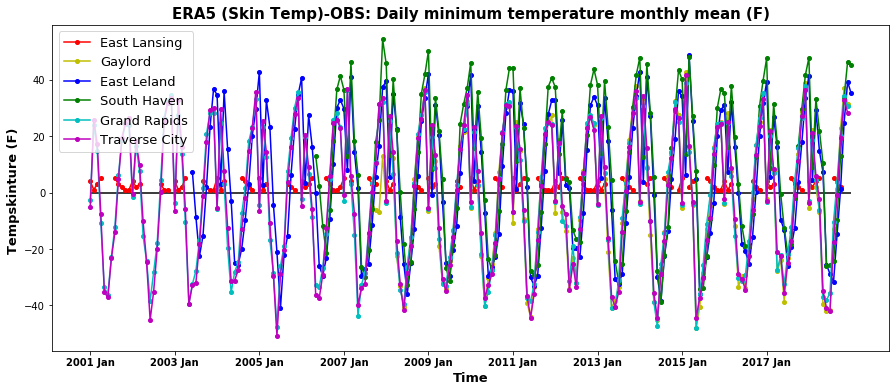

In [61]:
plt.figure(figsize=(15,6))
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
plt.plot(list(range(1,217)), t_daymin_diff_skin[0], 'r-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), t_daymin_diff_skin[1], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(30,218)), t_daymin_diff_skin[2], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(65,218)), t_daymin_diff_skin[3], 'g-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymin_diff_skin[4], 'c-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymin_diff_skin[5], 'm-o', lw=1.5, ms=4)

plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Tempskinture (F) ', fontweight='bold', fontsize=13)
plt.legend(['East Lansing', 'Gaylord','East Leland', 'South Haven', 'Grand Rapids', 'Traverse City'],fontsize = 13)
plt.title('ERA5 (Skin Temp)-OBS: Daily minimum temperature monthly mean (F)', fontweight='bold', fontsize=15)
plt.savefig('./plot/Summary/ERA5_skin_tmin_diff.png')

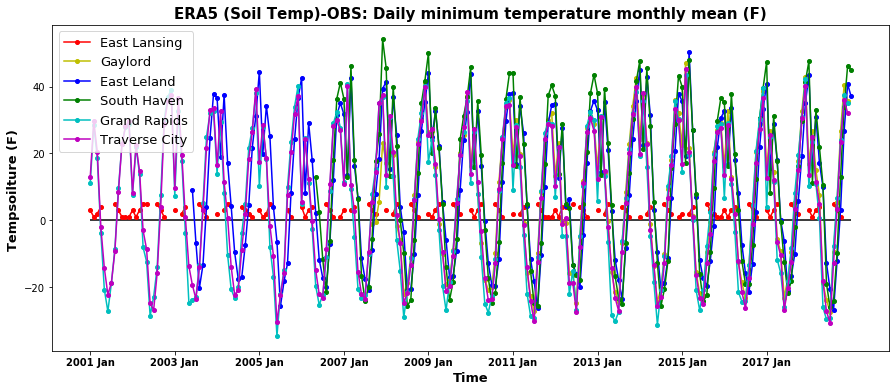

In [63]:
plt.figure(figsize=(15,6))
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
plt.plot(list(range(1,217)), t_daymin_diff_soil[0], 'r-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), t_daymin_diff_soil[1], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(30,218)), t_daymin_diff_soil[2], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(65,218)), t_daymin_diff_soil[3], 'g-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymin_diff_soil[4], 'c-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymin_diff_soil[5], 'm-o', lw=1.5, ms=4)

plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Tempsoilture (F) ', fontweight='bold', fontsize=13)
plt.legend(['East Lansing', 'Gaylord','East Leland', 'South Haven', 'Grand Rapids', 'Traverse City'],fontsize = 13)
plt.title('ERA5 (Soil Temp)-OBS: Daily minimum temperature monthly mean (F)', fontweight='bold', fontsize=15)
plt.savefig('./plot/Summary/ERA5_soil_tmin_diff.png')

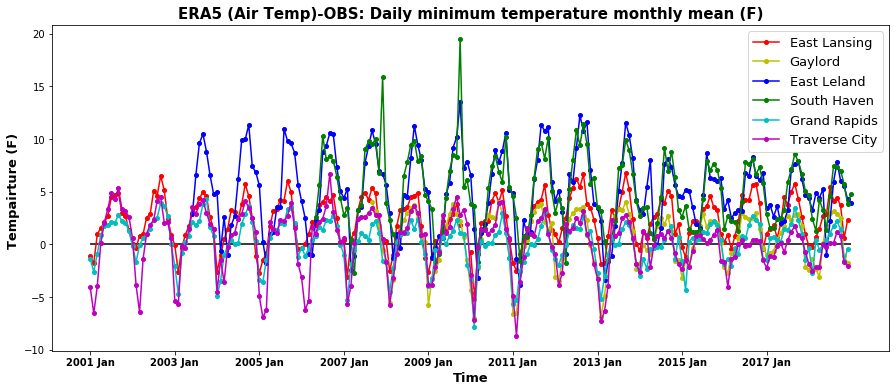

In [102]:
plt.figure(figsize=(15,6))
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
plt.plot(list(range(1,217)), t_daymin_diff_air[0], 'r-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), t_daymin_diff_air[1], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(30,218)), t_daymin_diff_air[2], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(65,218)), t_daymin_diff_air[3], 'g-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymin_diff_air[4], 'c-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymin_diff_air[5], 'm-o', lw=1.5, ms=4)

plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Tempairture (F) ', fontweight='bold', fontsize=13)
plt.legend(['East Lansing', 'Gaylord','East Leland', 'South Haven', 'Grand Rapids', 'Traverse City'],fontsize = 13)
plt.title('ERA5 (Air Temp)-OBS: Daily minimum temperature monthly mean (F)', fontweight='bold', fontsize=15)
plt.savefig('./plot/Summary/ERA5_air_tmin_diff.png')

In [99]:
import pytz
eastern = pytz.timezone('US/Eastern')
dff = [pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='9/19/2007', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='5/2/2003', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='4/6/2006', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)]
locn = ['el','gl','ele','sh','gr','tvc']
t_daymax_obs = [t_daymax_obs_el,t_daymax_obs_gl,t_daymax_obs_ele,t_daymax_obs_sh,t_daymax_obs_gr,t_daymax_obs_tvc]
t_daymax_diff_skin = []
t_daymax_diff_soil = []
t_daymax_diff_air = []
for i in range(6):
    year = dff[i].strftime('%Y')
    mon = dff[i].strftime('%-m')
    day = dff[i].strftime('%-d')
    
    mdiff = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymax_diff':np.array(t_daymax_eraskin[i])-np.array(t_daymax_obs[i])})
    mdiff = mdiff.astype(float)
    t_daymax_diff_skin.append(np.array(mdiff.groupby([mdiff.YEAR,mdiff.MONTH])['t_daymax_diff'].mean()))
    
    mdiff = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymax_diff':np.array(t_daymax_erasoil[i])-np.array(t_daymax_obs[i])})
    mdiff = mdiff.astype(float)
    t_daymax_diff_soil.append(np.array(mdiff.groupby([mdiff.YEAR,mdiff.MONTH])['t_daymax_diff'].mean()))
    
    mdiff = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymax_diff':np.array(t_daymax_eraair[i])-np.array(t_daymax_obs[i])})
    mdiff = mdiff.astype(float)
    t_daymax_diff_air.append(np.array(mdiff.groupby([mdiff.YEAR,mdiff.MONTH])['t_daymax_diff'].mean()))

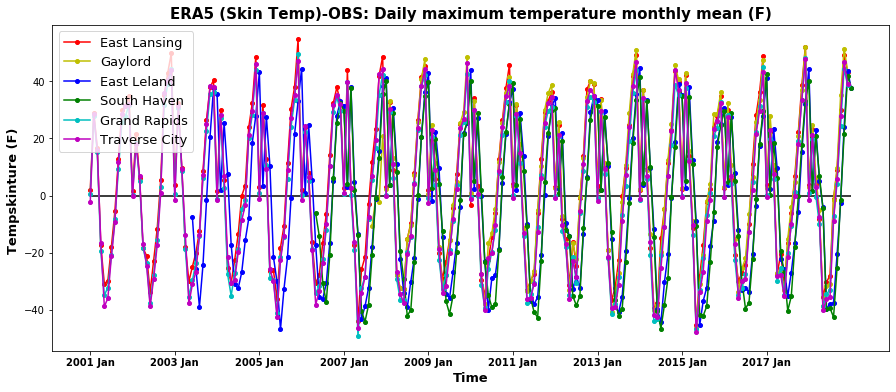

In [70]:
plt.figure(figsize=(15,6))
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
plt.plot(list(range(1,217)), t_daymax_diff_skin[0], 'r-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), t_daymax_diff_skin[1], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(30,218)), t_daymax_diff_skin[2], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(65,218)), t_daymax_diff_skin[3], 'g-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymax_diff_skin[4], 'c-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymax_diff_skin[5], 'm-o', lw=1.5, ms=4)

plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Tempskinture (F) ', fontweight='bold', fontsize=13)
plt.legend(['East Lansing', 'Gaylord','East Leland', 'South Haven', 'Grand Rapids', 'Traverse City'],fontsize = 13)
plt.title('ERA5 (Skin Temp)-OBS: Daily maximum temperature monthly mean (F)', fontweight='bold', fontsize=15)
plt.savefig('./plot/Summary/ERA5_skin_tmax_diff.png')

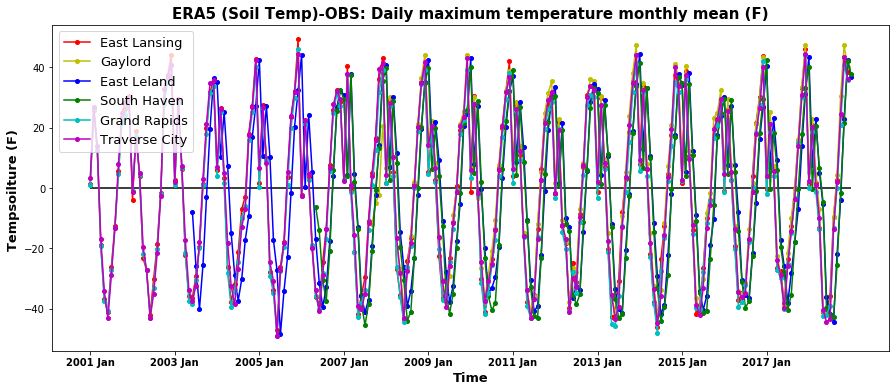

In [71]:
plt.figure(figsize=(15,6))
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
plt.plot(list(range(1,217)), t_daymax_diff_soil[0], 'r-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), t_daymax_diff_soil[1], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(30,218)), t_daymax_diff_soil[2], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(65,218)), t_daymax_diff_soil[3], 'g-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymax_diff_soil[4], 'c-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymax_diff_soil[5], 'm-o', lw=1.5, ms=4)

plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Tempsoilture (F) ', fontweight='bold', fontsize=13)
plt.legend(['East Lansing', 'Gaylord','East Leland', 'South Haven', 'Grand Rapids', 'Traverse City'],fontsize = 13)
plt.title('ERA5 (Soil Temp)-OBS: Daily maximum temperature monthly mean (F)', fontweight='bold', fontsize=15)
plt.savefig('./plot/Summary/ERA5_soil_tmax_diff.png')

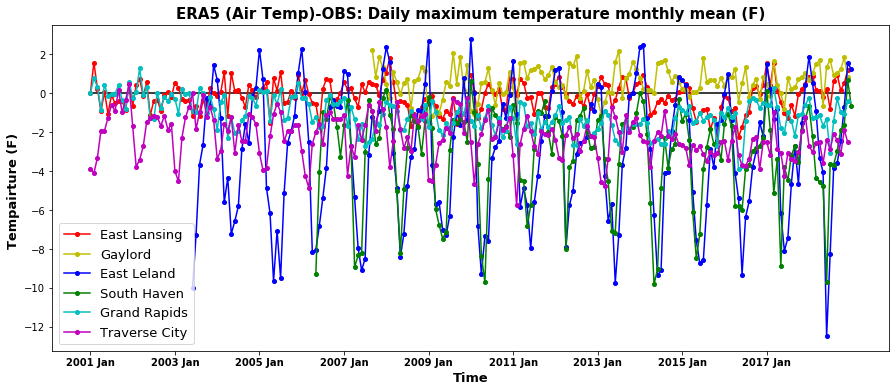

In [101]:
plt.figure(figsize=(15,6))
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
plt.plot(list(range(1,217)), t_daymax_diff_air[0], 'r-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), t_daymax_diff_air[1], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(30,218)), t_daymax_diff_air[2], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(65,218)), t_daymax_diff_air[3], 'g-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymax_diff_air[4], 'c-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymax_diff_air[5], 'm-o', lw=1.5, ms=4)

plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Tempairture (F) ', fontweight='bold', fontsize=13)
plt.legend(['East Lansing', 'Gaylord','East Leland', 'South Haven', 'Grand Rapids', 'Traverse City'],fontsize = 13)
plt.title('ERA5 (Air Temp)-OBS: Daily maximum temperature monthly mean (F)', fontweight='bold', fontsize=15)
plt.savefig('./plot/Summary/ERA5_air_tmax_diff.png')

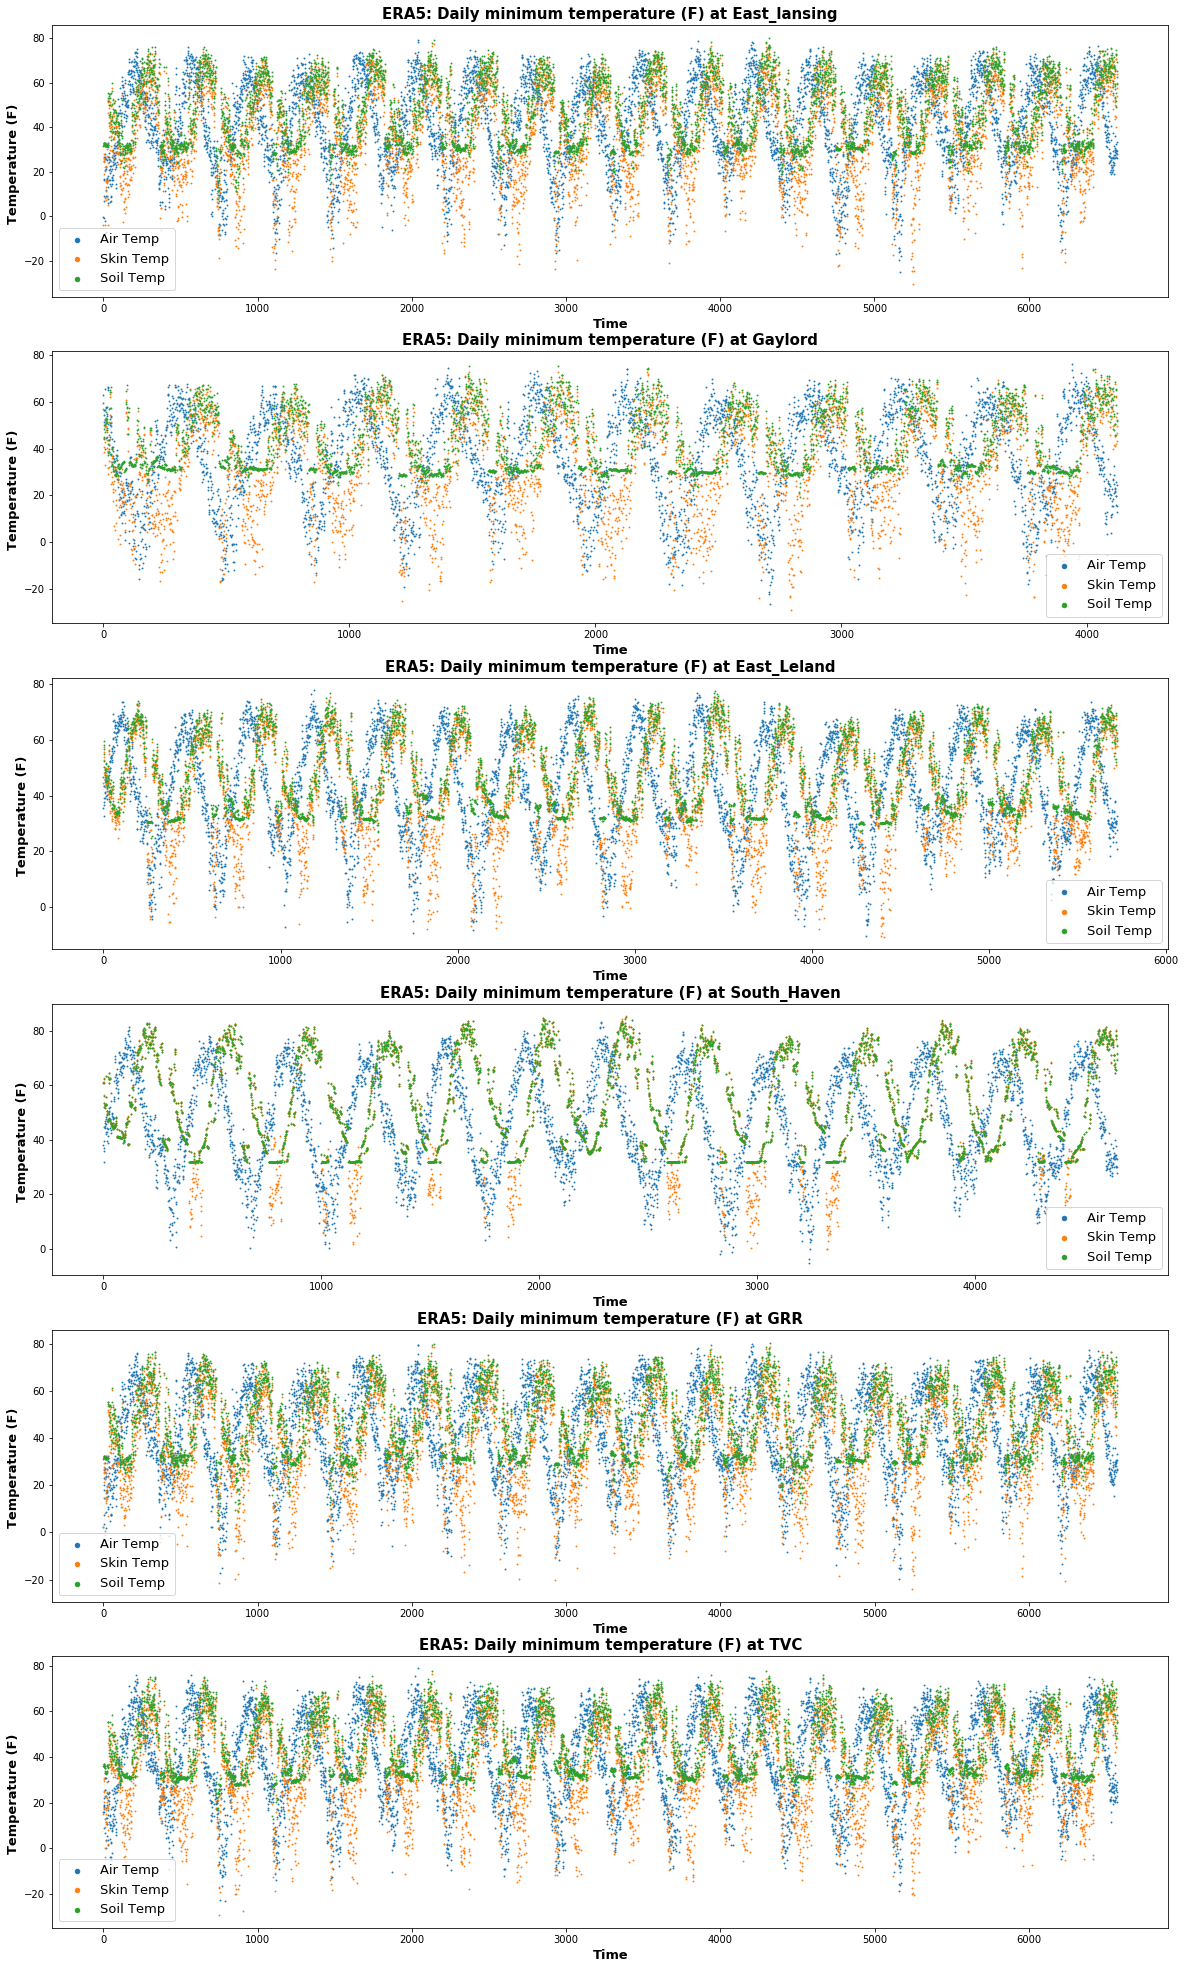

In [11]:
l = [len(t_daymin_obs[i]) for i in range(6)]
plt.subplots(6,1,figsize=(20,35))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.scatter(range(l[i]), t_daymin_eraair[i], s=.8)
    plt.scatter(range(l[i]), t_daymin_eraskin[i], s=.8)
    plt.scatter(range(l[i]), t_daymin_erasoil[i], s=.8)

    plt.xlabel('Time', fontweight='bold', fontsize=13)
    plt.ylabel('Temperature (F) ', fontweight='bold', fontsize=13)
    plt.legend(['Air Temp', 'Skin Temp','Soil Temp'],markerscale=5, fontsize=13)
    plt.title(f'ERA5: Daily minimum temperature (F) at {stations[i]}', fontweight='bold', fontsize=15)
plt.savefig(f'./plot/Summary/ERA5_tmin_3.png')

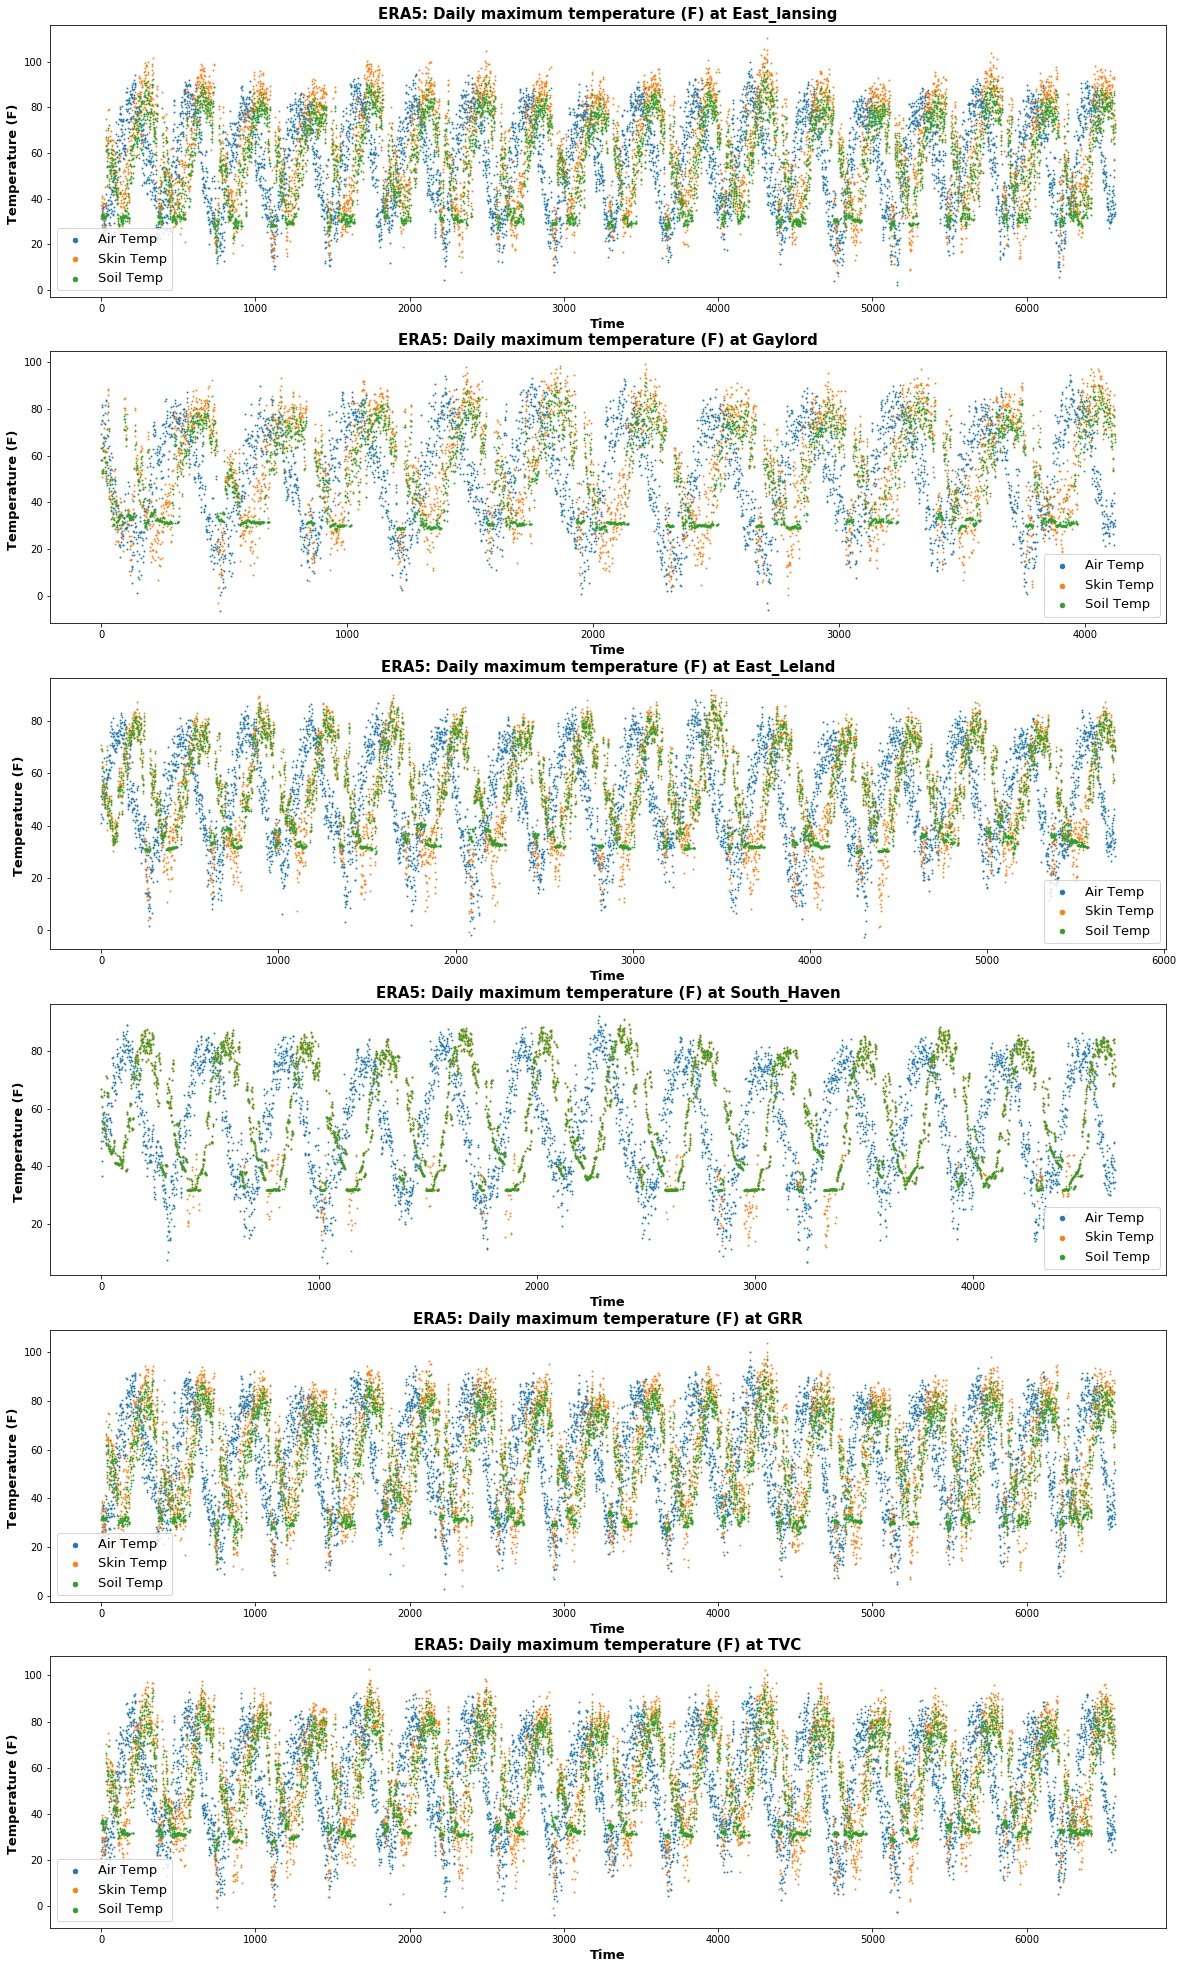

In [12]:
plt.subplots(6,1,figsize=(20,35))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.scatter(range(l[i]), t_daymax_eraair[i], s=.8)
    plt.scatter(range(l[i]), t_daymax_eraskin[i], s=.8)
    plt.scatter(range(l[i]), t_daymax_erasoil[i], s=.8)

    plt.xlabel('Time', fontweight='bold', fontsize=13)
    plt.ylabel('Temperature (F) ', fontweight='bold', fontsize=13)
    plt.legend(['Air Temp', 'Skin Temp','Soil Temp'],markerscale=5, fontsize=13)
    plt.title(f'ERA5: Daily maximum temperature (F) at {stations[i]}', fontweight='bold', fontsize=15)
plt.savefig(f'./plot/Summary/ERA5_tmax_3.png')

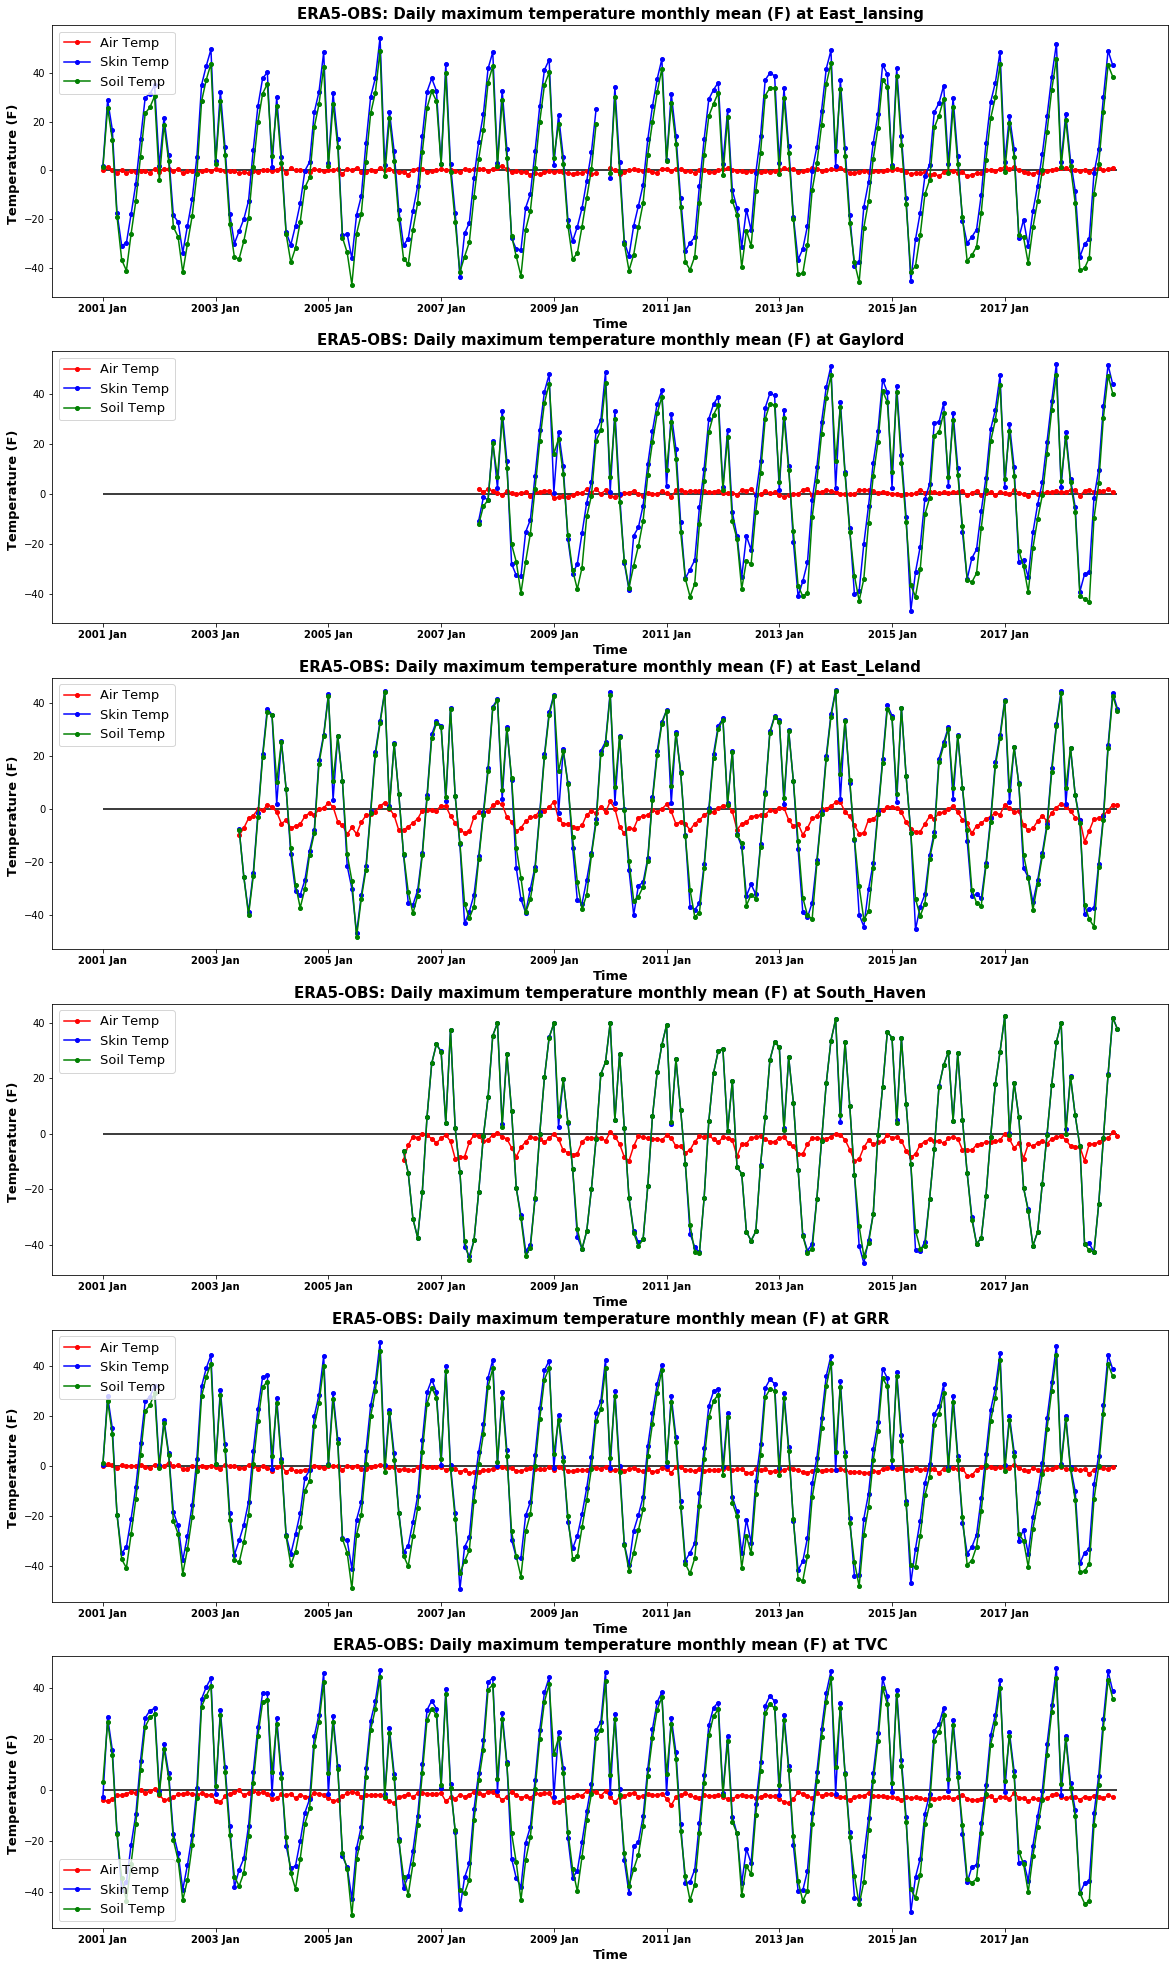

In [121]:
dayl = [range(1,217), range(81,217), range(30,218), range(65,218), range(1,217), range(1,217)]
plt.subplots(6,1,figsize=(20,35))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.plot(dayl[i], t_daymax_diff_air[i], 'r-o', lw=1.5, ms=4)
    plt.plot(dayl[i], t_daymax_diff_skin[i], 'b-o', lw=1.5, ms=4)
    plt.plot(dayl[i], t_daymax_diff_soil[i], 'g-o', lw=1.5, ms=4)
    
    plt.hlines(0, 1, 217, 'k', lw=1.5)
    plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
    plt.xlabel('Time', fontweight='bold', fontsize=13)
    plt.ylabel('Temperature (F) ', fontweight='bold', fontsize=13)
    plt.legend(['Air Temp', 'Skin Temp','Soil Temp'],fontsize=13)
    plt.title(f'ERA5-OBS: Daily maximum temperature monthly mean (F) at {stations[i]}', fontweight='bold', fontsize=15)
plt.savefig(f'./plot/Summary/ERA5_tmax_diff_3.png')

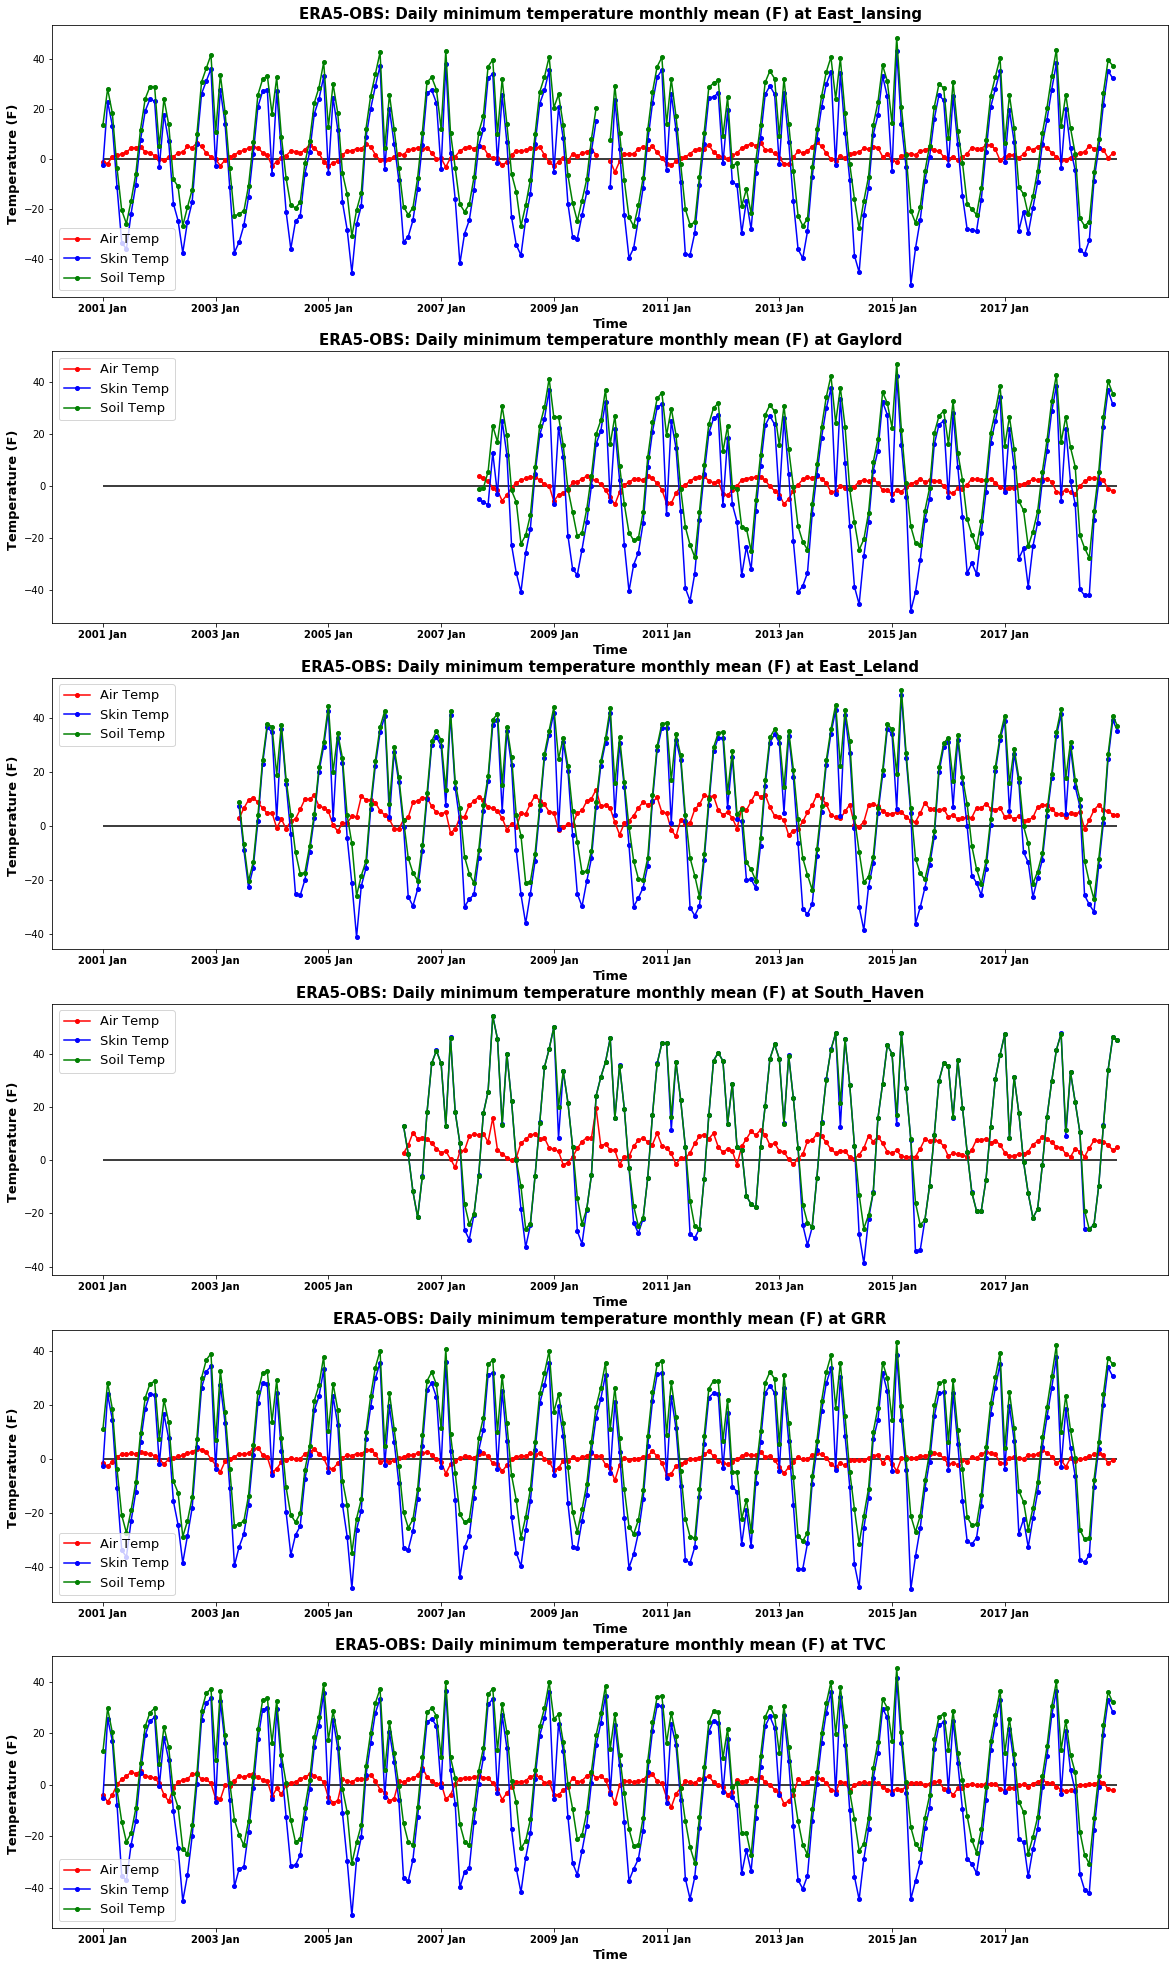

In [120]:
dayl = [range(1,217), range(81,217), range(30,218), range(65,218), range(1,217), range(1,217)]
plt.subplots(6,1,figsize=(20,35))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.plot(dayl[i], t_daymin_diff_air[i], 'r-o', lw=1.5, ms=4)
    plt.plot(dayl[i], t_daymin_diff_skin[i], 'b-o', lw=1.5, ms=4)
    plt.plot(dayl[i], t_daymin_diff_soil[i], 'g-o', lw=1.5, ms=4)
    
    plt.hlines(0, 1, 217, 'k', lw=1.5)
    plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
    plt.xlabel('Time', fontweight='bold', fontsize=13)
    plt.ylabel('Temperature (F) ', fontweight='bold', fontsize=13)
    plt.legend(['Air Temp', 'Skin Temp','Soil Temp'],fontsize=13)
    plt.title(f'ERA5-OBS: Daily minimum temperature monthly mean (F) at {stations[i]}', fontweight='bold', fontsize=15)
plt.savefig(f'./plot/Summary/ERA5_tmin_diff_3.png')